In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


In [2]:
import pandas as pd
#encoding='unicode_escape' 由于是英文版所以要加上这个避免报错
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SupplyChain.csv', encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [3]:
dataset.shape

(180519, 53)

In [4]:
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [5]:
dataset[['Customer Fname', 'Customer Lname']]

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks
...,...,...
180514,Maria,Peterson
180515,Ronald,Clark
180516,John,Smith
180517,Mary,Smith


In [6]:
#将 firstname和lastname进行合并
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset[['Customer Full Name', 'Customer Fname', 'Customer Lname']]

,Customer Full Name,Customer Fname,Customer Lname
0,CallyHolloway,Cally,Holloway
1,IreneLuna,Irene,Luna
2,GillianMaldonado,Gillian,Maldonado
3,TanaTate,Tana,Tate
4,OrliHendricks,Orli,Hendricks
...,...,...,...
180514,MariaPeterson,Maria,Peterson
180515,RonaldClark,Ronald,Clark
180516,JohnSmith,John,Smith
180517,MarySmith,Mary,Smith


In [7]:
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [8]:
dataset['Customer Zipcode'].isnull().sum()

3

In [9]:
#用0进行填充
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
dataset['Customer Zipcode'].isnull().sum()

0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#特征字段之间相关性
data = dataset
data.corr

<bound method DataFrame.corr of             Type  Days for shipping (real)  ...   Shipping Mode  Customer Full Name
0          DEBIT                         3  ...  Standard Class       CallyHolloway
1       TRANSFER                         5  ...  Standard Class           IreneLuna
2           CASH                         4  ...  Standard Class    GillianMaldonado
3          DEBIT                         3  ...  Standard Class            TanaTate
4        PAYMENT                         2  ...  Standard Class       OrliHendricks
...          ...                       ...  ...             ...                 ...
180514      CASH                         4  ...  Standard Class       MariaPeterson
180515     DEBIT                         3  ...    Second Class         RonaldClark
180516  TRANSFER                         5  ...  Standard Class           JohnSmith
180517   PAYMENT                         3  ...  Standard Class           MarySmith
180518   PAYMENT                         4  

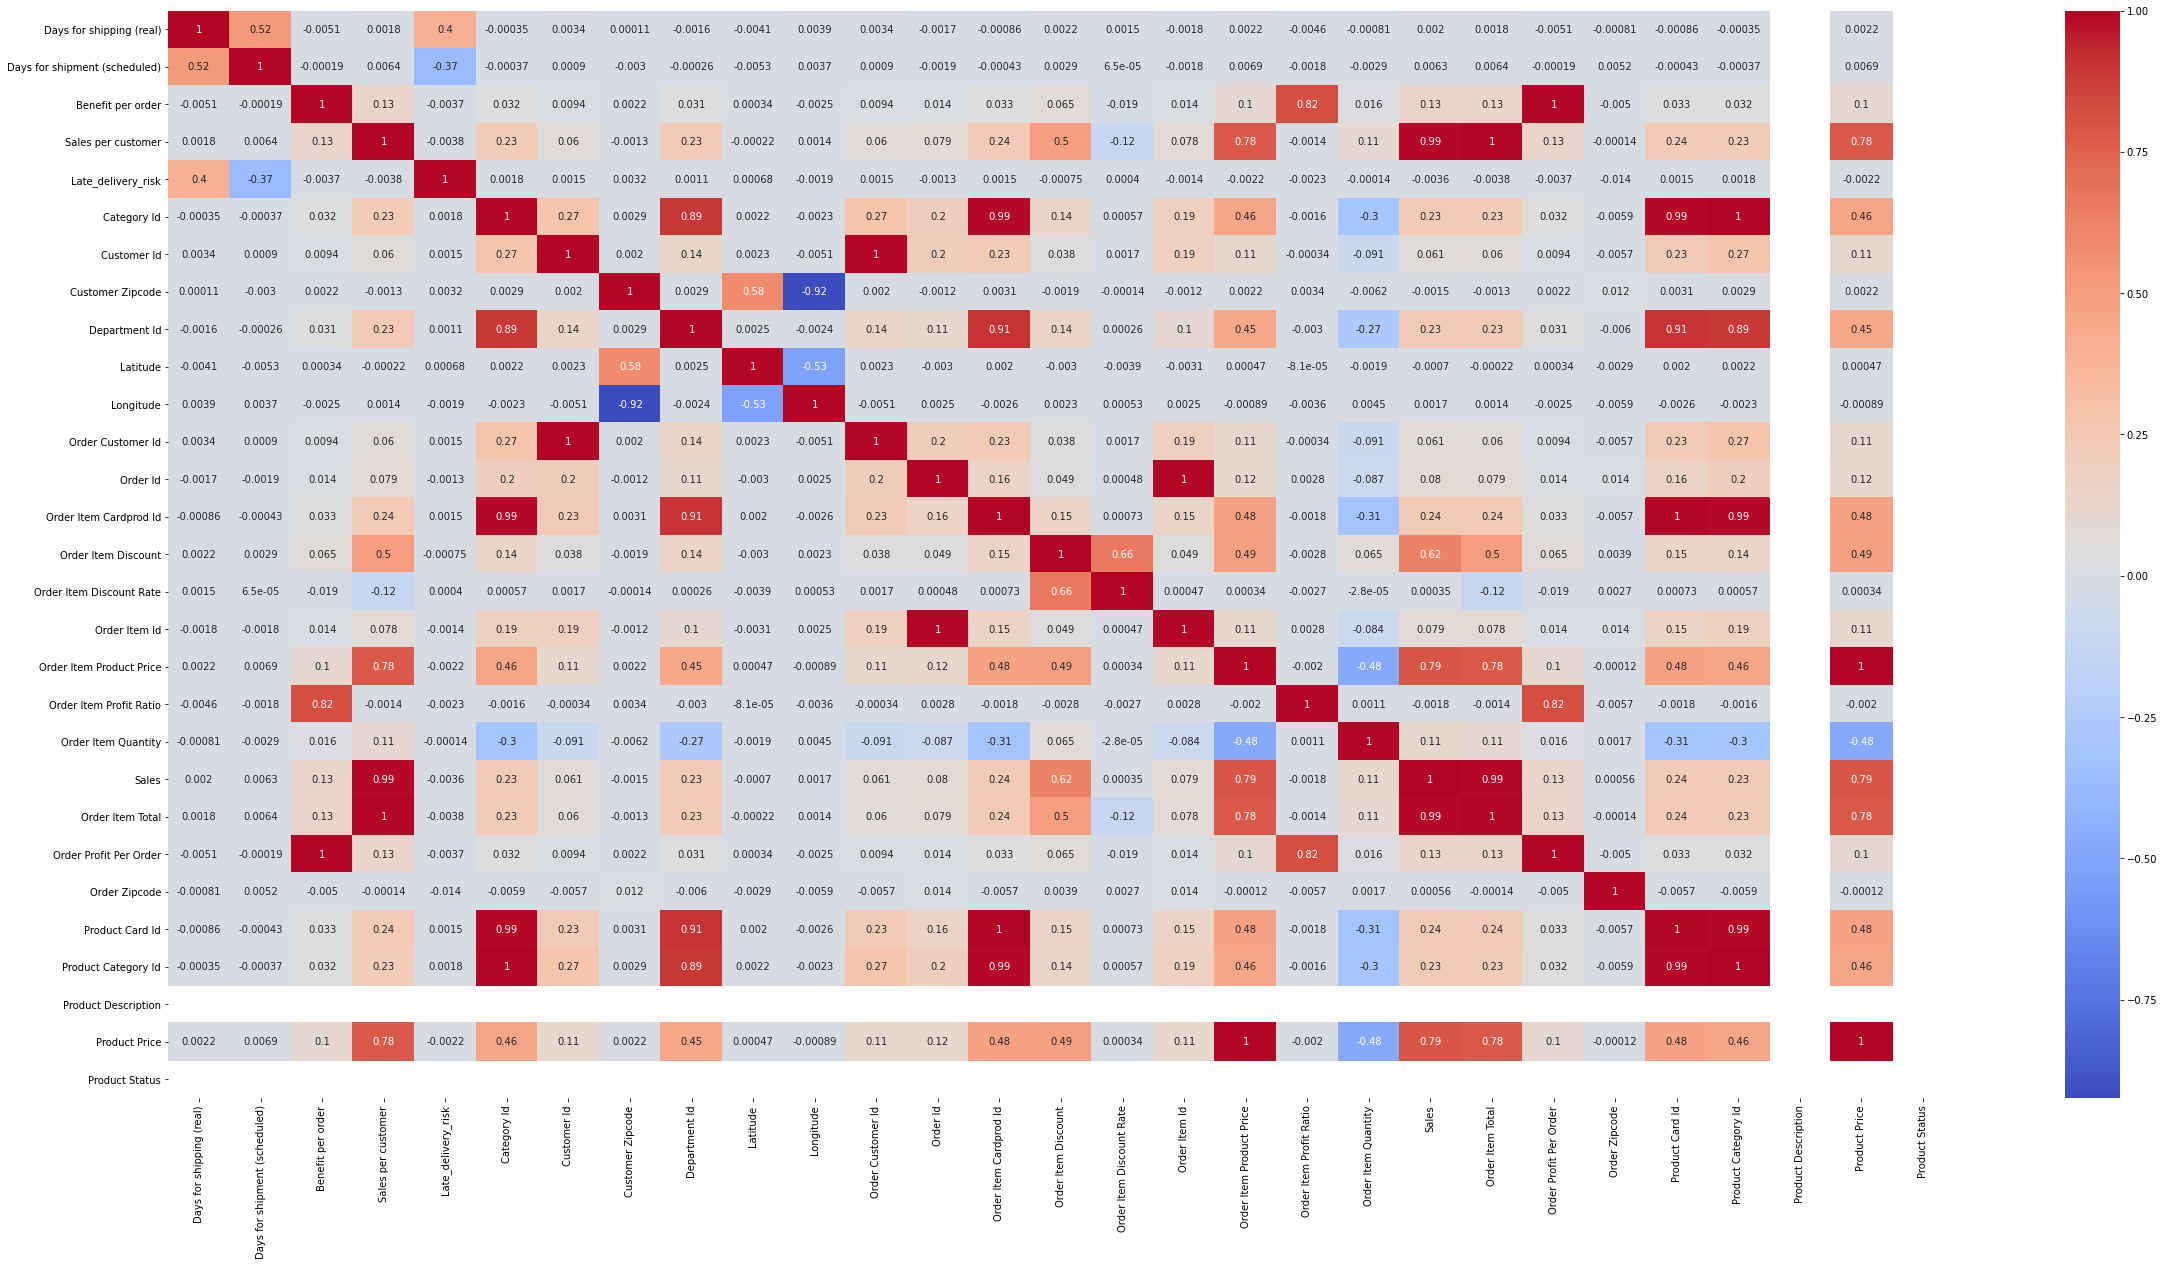

In [11]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') 

In [12]:
#按照不同的Market，Order Region
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

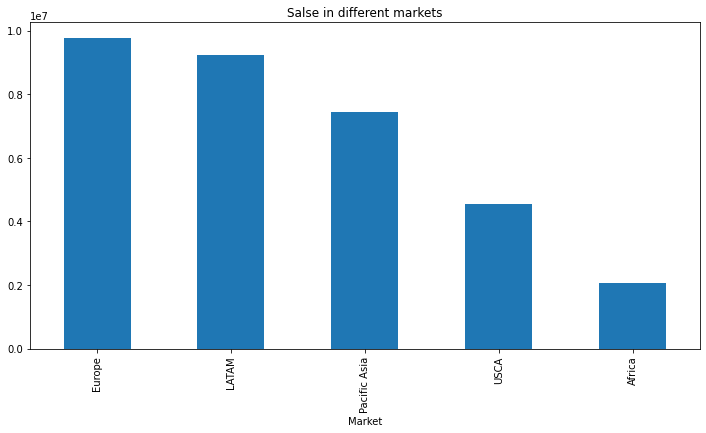

In [13]:
#基于Market
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Salse in different markets')

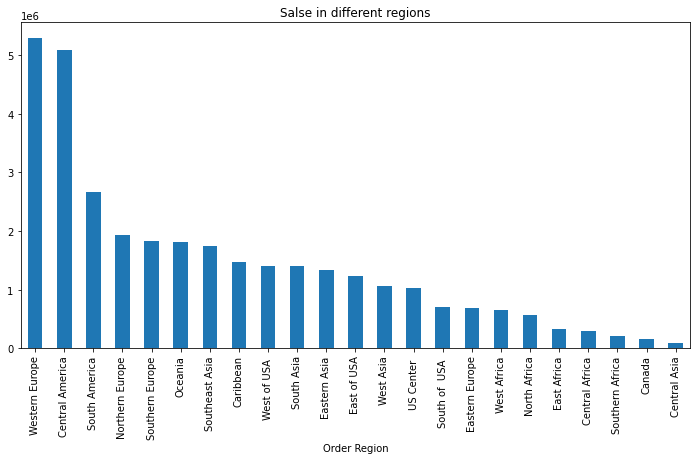

In [14]:
# 基于Order Region
#基于Market
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Salse in different regions')

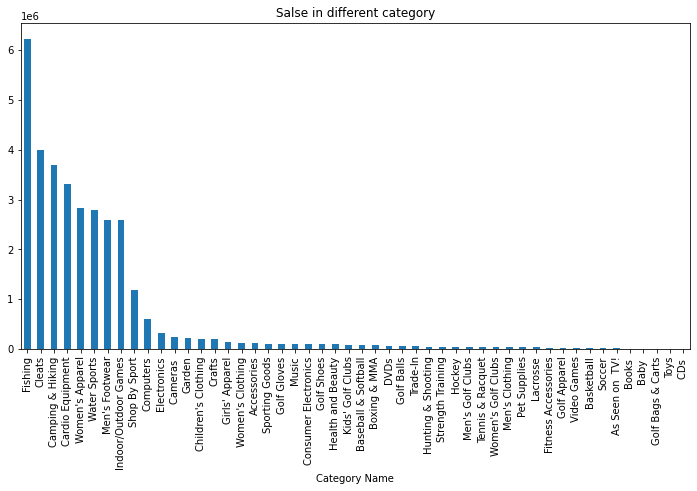

In [15]:
#按照不同的Category Name
cat = data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Salse in different category')

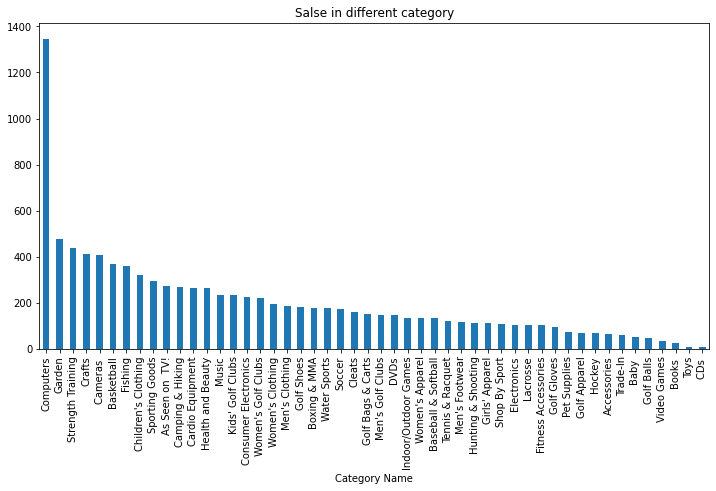

In [16]:
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Salse in different category')

In [17]:
#按照不同的时间维度（年、月、星期、小时）的趋势
#创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [18]:
#order date (DateOrders)字段中的year，month，weekday，hour，month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']]
# wekk_day中的0是周一

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


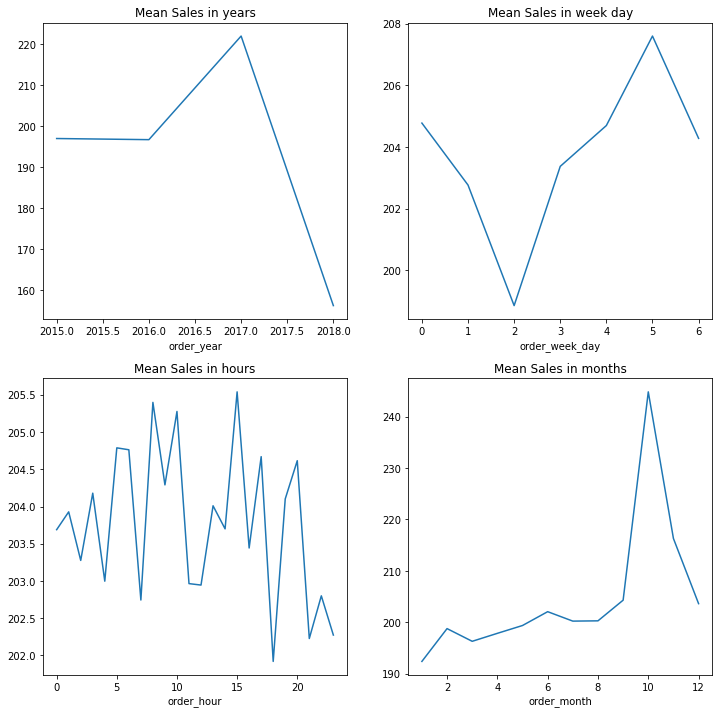

In [19]:
# 对销售额进行探索，按照不同的时间维度 年、月、星期、小时
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in years')
plt.subplot(2,2,2)
df_week_day = data.groupby('order_week_day')
df_week_day['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in week day')
plt.subplot(2,2,3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in hours')
plt.subplot(2,2,4)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in months')

Text(0, 0.5, 'Sales per customer')

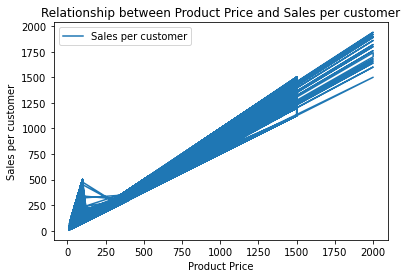

In [20]:
# Product Price 与 Sales per customer 相关性如何
data.plot(x='Product Price',y='Sales per customer')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')

#以下为第二节课能容

In [21]:
#统计最后一笔订单时间
data['order date (DateOrders)'].max()

'9/9/2017 9:50'

In [22]:
#时间类型转换
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [23]:
#假设我们现在时间为2-18-2-1
import datetime
present = datetime.datetime(2018,2,1)
present

datetime.datetime(2018, 2, 1, 0, 0)

In [25]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status,order_year,order_month,order_week_day,order_hour
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35920.529950,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0,2015.971150,6.235449,3.007622,11.483689
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.434755,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0,0.829429,3.403571,2.001536,6.923006
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,0.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0,2015.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0,2015.000000,3.000000,1.000000,5.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0,2016.000000,6.000000,3.000000,11.000000
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0,2017.000000,9.000000,5.000000,17.000000
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0,2018.000000,12.000000,6.000000,23.000000


In [26]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [28]:
#计算每个用户的RFM指标
#按照Order Customer Id进行聚合Recency，Frequency，Monetary
customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present-x.max()).days, \
                            'Order Id' : lambda x: len(x), 'Sales': lambda x: x.sum()})
customer_seg 

,order date (DateOrders),Order Id,Sales
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [29]:
#将RFM数据划分为四个尺度
quantiles = customer_seg.quantile(q=[0.25,0.5,0.75])
quantiles

,order date (DateOrders),Order Id,Sales
0.25,75.0,1.0,293.040008
0.50,159.0,7.0,1499.825033
0.75,307.0,15.0,2915.880065


In [34]:
quantiles = customer_seg.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175},
 'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0}}

In [37]:
#转换为[1,4]
def R_Score(a,b,c):
  if a <= c[b][0.25]:
    return 4
  if a <= c[b][0.50]:
    return 3
  if a <= c[b][0.75]:
    return 2
  return 1
# Frequency Monetary越大越好
def FM_Score(a,b,c):
  if a <= c[b][0.25]:
    return 1
  if a <= c[b][0.50]:
    return 2
  if a <= c[b][0.75]:
    return 3
  return 4

In [32]:
#order date (DateOrders)	Order Id	Sales
#将字段名称改成R_Value, F_Value, M_Value
customer_seg.rename(columns={'order date (DateOrders)':'R_Value','Order Id':'F_Value','Sales':'M_Value'},inplace=True)
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [38]:
#新建R_Score,用于将R_Value =>[1,4]
customer_seg['R_Score'] = customer_seg['R_Value'].apply(R_Score, args=('R_Value', quantiles))
customer_seg['F_Score'] = customer_seg['F_Value'].apply(FM_Score, args=('F_Value', quantiles))
customer_seg['M_Score'] = customer_seg['M_Value'].apply(FM_Score, args=('M_Value', quantiles))
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,499.950012,1,1,2
2,136,10,1819.730034,3,3,3
3,229,18,3537.680094,2,4,4
4,380,14,1719.630030,1,3,3
5,457,7,1274.750023,1,2,2
...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1
20754,0,1,215.820007,4,1,1
20755,0,1,327.750000,4,1,2


In [39]:
#计算RFM用户分层
def RFM_User(df):
  if df['M_Score']>2 and df['F_Score']>2 and df['R_Score']>2:
    return '重要价值用户'
  if df['M_Score']>2 and df['F_Score']<=2 and df['R_Score']>2:
    return '重要发展用户'
  if df['M_Score']>2 and df['F_Score']>2 and df['R_Score']<=2:
    return '重要保持用户'
  if df['M_Score']>2 and df['F_Score']<=2 and df['R_Score']<=2:
    return '重要挽留用户'
  if df['M_Score']<=2 and df['F_Score']>2 and df['R_Score']>2:
    return '一般价值用户'
  if df['M_Score']<=2 and df['F_Score']<=2 and df['R_Score']>2:
    return '一般发展用户'
  if df['M_Score']<=2 and df['F_Score']>2 and df['R_Score']<=2:
    return '一般保持用户'
  if df['M_Score']<=2 and df['F_Score']<=2 and df['R_Score']<=2:
    return '一般挽留用户'

In [40]:
#
customer_seg['Customer_Segmentation'] = customer_seg.apply(RFM_User,axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,499.950012,1,1,2,一般挽留用户
2,136,10,1819.730034,3,3,3,重要价值用户
3,229,18,3537.680094,2,4,4,重要保持用户
4,380,14,1719.630030,1,3,3,重要保持用户
5,457,7,1274.750023,1,2,2,一般挽留用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1,一般发展用户
20754,0,1,215.820007,4,1,1,一般发展用户
20755,0,1,327.750000,4,1,2,一般发展用户


In [41]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [42]:
#显示不同地区的支付类型情况
data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [43]:
pay_type1 = data[data['Type'] == 'DEBIT'] #借贷
pay_type2 = data[data['Type'] == 'TRANSFER'] #转账
pay_type3 = data[data['Type'] == 'PAYMENT'] #支付
pay_type4 = data[data['Type'] == 'CASH'] #现金


In [44]:
pay_type1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,2018-01-13 10:42:00,75934,1360,39.330002,0.12,179249,327.750000,0.33,1,327.750000,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:42,First Class,ConstanceTerrell,2018,1,5,10,2018-01
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Natalie,19480,Mcfadden,XXXXXXXXX,Corporate,PR,2531 Wishing Square,725.0,2,Fitness,18.278439,-66.037056,Pacific Asia,Sangli,India,19480,2018-01-13 08:15:00,75927,1360,81.940002,0.25,179242,327.750000,0.10,1,327.750000,245.809998,24.580000,South Asia,Maharashtra,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 8:15,First Class,NatalieMcfadden,2018,1,5,8,2018-01
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Sade,19478,Lancaster,XXXXXXXXX,Corporate,PR,257 Harvest Close,725.0,2,Fitness,18.284050,-66.037056,Pacific Asia,Sangli,India,19478,2018-01-13 07:33:00,75925,1360,3.280000,0.01,179240,327.750000,-0.80,1,327.750000,324.470001,-259.579987,South Asia,Maharashtra,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 7:33,First Class,SadeLancaster,2018,1,5,7,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180505,DEBIT,2,4,112.669998,359.980011,Advance shipping,0,45,Fishing,Highland,EE. UU.,XXXXXXXXX,Christine,1038,Briggs,XXXXXXXXX,Corporate,CA,7127 Quiet Zephyr Nook,92346.0,7,Fan Shop,34.135822,-117.220947,Pacific Asia

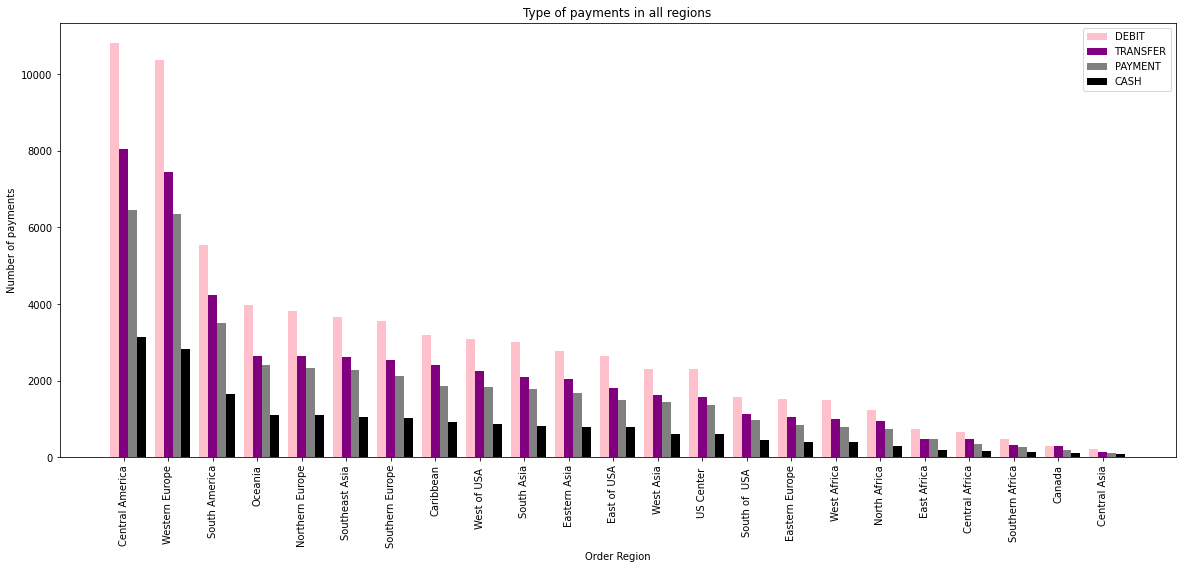

In [54]:
import numpy as np
#获取四种支付方式中不同地区的特点
count1 = pay_type1['Order Region'].value_counts() # DEBIT
count2 = pay_type2['Order Region'].value_counts() # TRANSFER
count3 = pay_type3['Order Region'].value_counts() # PAYMENT
count4 = pay_type4['Order Region'].value_counts() # CASH
#获取地区region个数
region_sum = len(count1)
fig,ax = plt.subplots(figsize = (20,8))
index = np.arange(region_sum)
#每种类型的显示间隔
bar_width = 0.2
type1 = plt.bar(index,count1,bar_width,color='pink',label='DEBIT')
type1 = plt.bar(index+bar_width,count2,bar_width,color='purple',label='TRANSFER')
type1 = plt.bar(index+bar_width*2,count3,bar_width,color='grey',label='PAYMENT')
type1 = plt.bar(index+bar_width*3,count4,bar_width,color='black',label='CASH')
plt.xlabel('Order Region')
plt.ylabel('Number of payments')
plt.title('Type of payments in all regions')
plt.legend()
#显示刻度
names = data['Order Region'].value_counts().keys()
plt.xticks(index+bar_width,names,rotation='vertical') # rotation='vertical'表示字段垂直
plt.show()

# 分析结论
DEBIT是所有地区中使用最多的支付方式 
CASH是所有地区中使用最少的支付方式

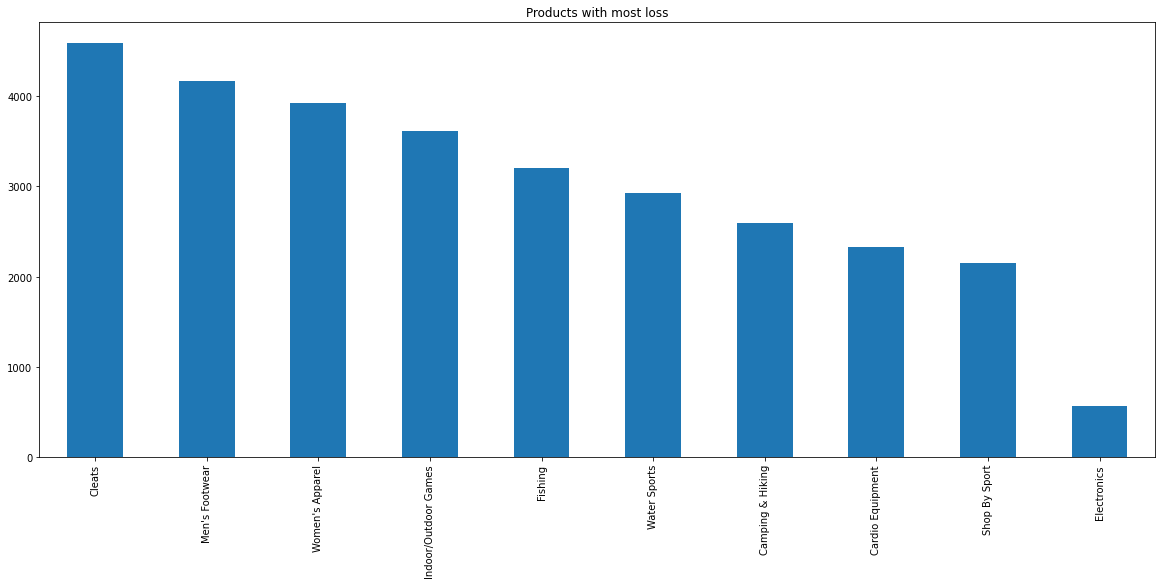

In [56]:
#对负收益产品进行探索
loss = data[data['Benefit per order'] < 0]
#显示Top10的负收益产品
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Products with most loss')

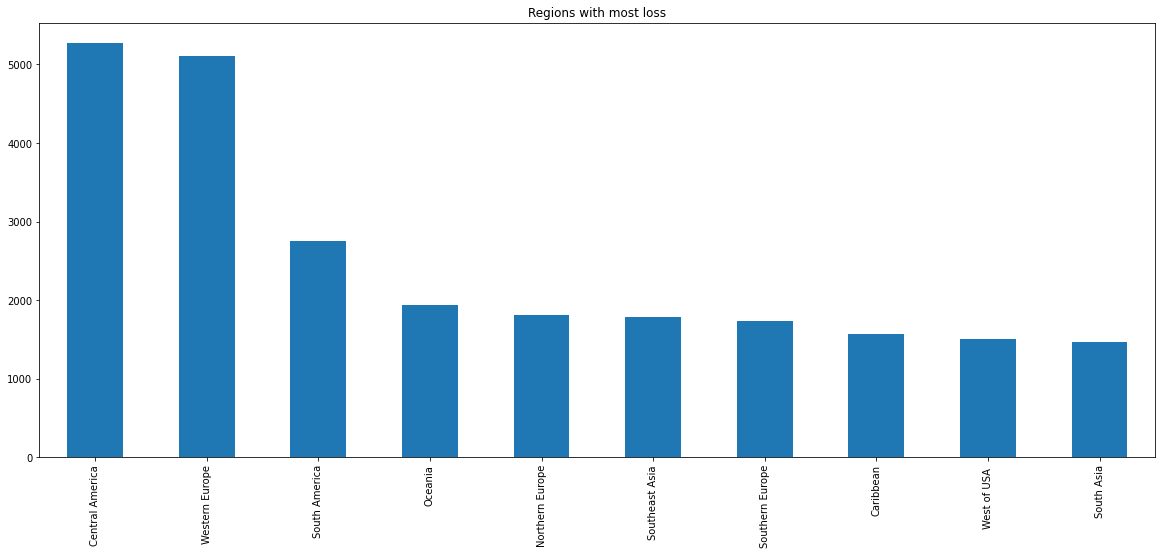

In [60]:
# 显示Top10的负收益地区
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Regions with most loss')

In [61]:
# 所有负收益产品带来的损失
print('总损失：', loss['Benefit per order'].sum())

总损失： -3883547.345768667


In [63]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [65]:
#负收益可能是欺诈交易，来自于那种支付方式
data[data['Order Status'] == 'SUSPECTED_FRAUD']['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

# 所以TRANSFER（转账）容易导致欺诈交易

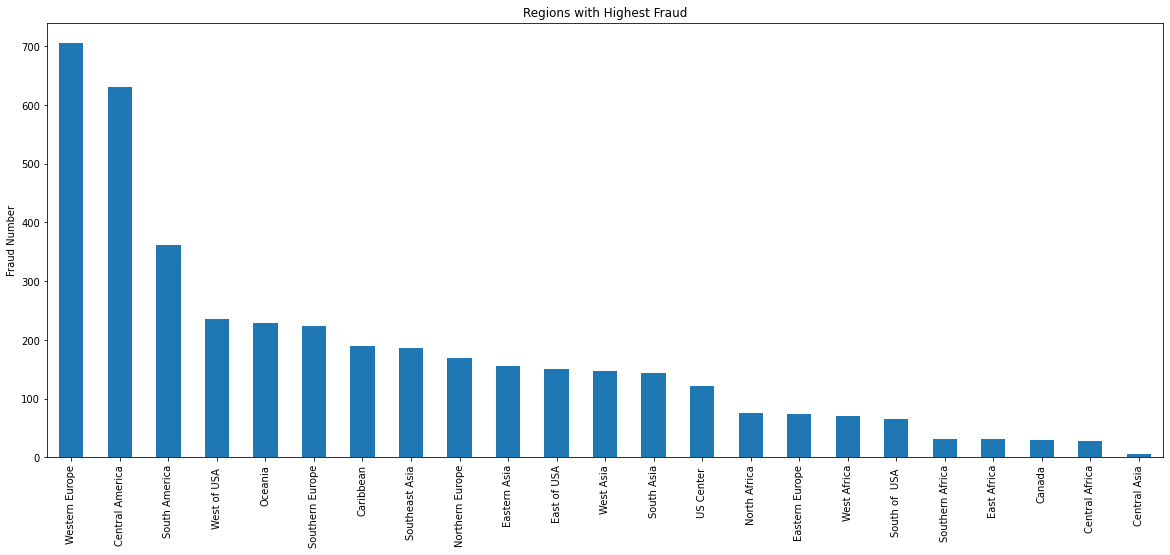

In [67]:
#显示不同地区的欺诈交易情况
high_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']
high_fraud['Order Region'].value_counts().plot.bar(figsize=(20,8))
plt.title('Regions with Highest Fraud')
plt.ylabel('Fraud Number')
plt.show()

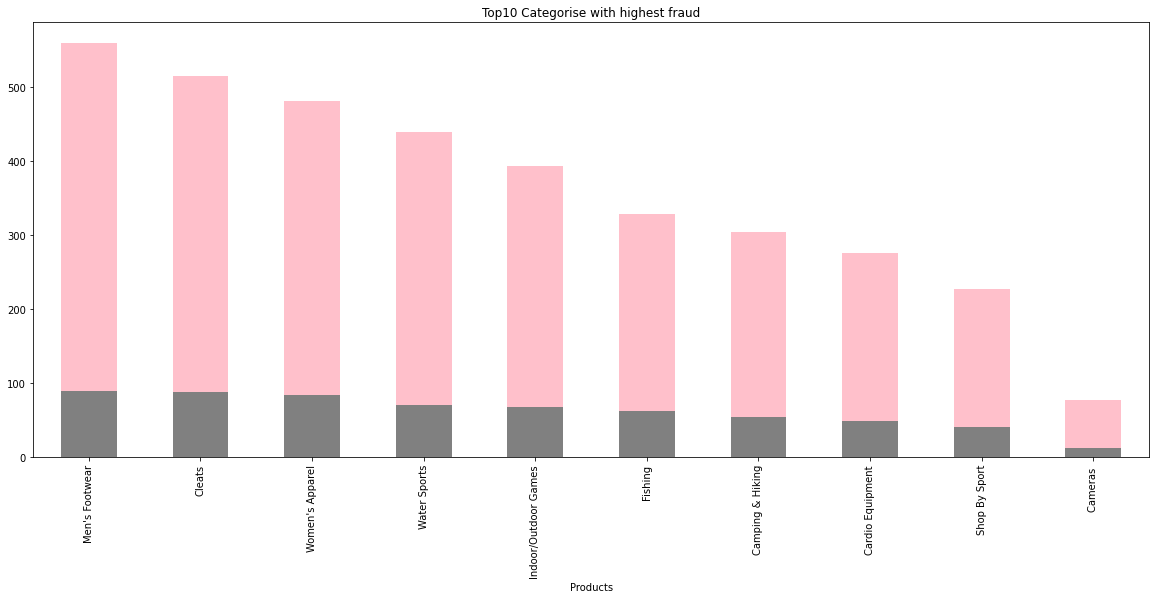

In [70]:
#Western Europe地区欺诈交易最多，将一个bar分成两个部分（堆积条形图）
high_fraud_total = data[data['Order Status'] == 'SUSPECTED_FRAUD']
high_fraud_we = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Order Region'] == 'Western Europe')]
#找出风险最高的十个Category
fraud1 = high_fraud_total['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category',color='pink')
fraud2 = high_fraud_we['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category',color='grey')
plt.title('Top10 Categorise with highest fraud')
plt.xlabel('Products')
plt.show()

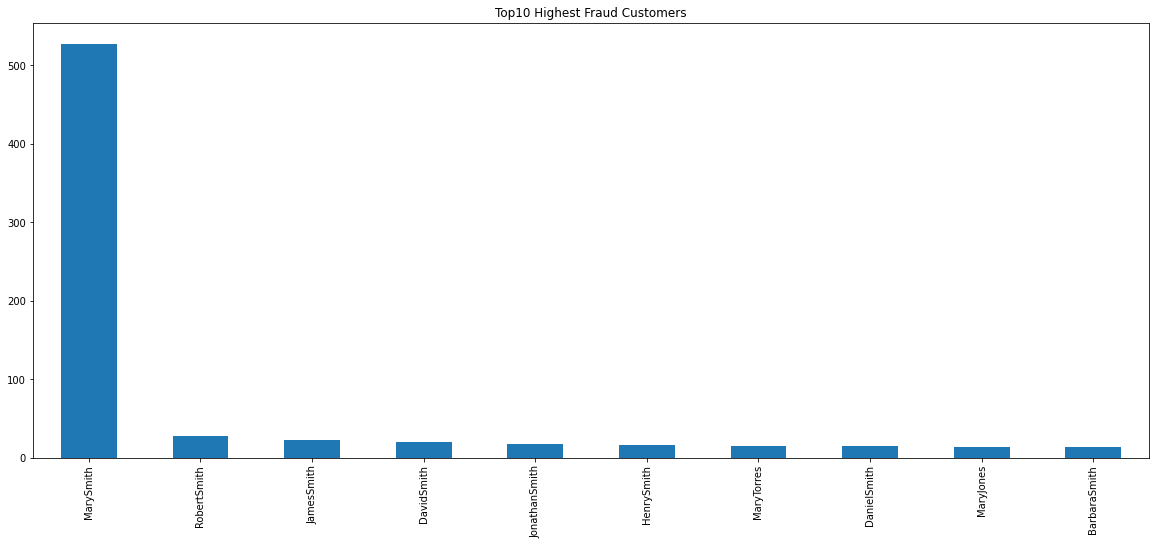

In [72]:
# 筛选出Top10的 Customer（风险）
cus = data[data['Order Status'] == 'SUSPECTED_FRAUD']
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Top10 Highest Fraud Customers')

In [74]:
# 找到MarySmith的交易金额
print('MarySmith的交易总金额：',data[data['Customer Full Name'] == 'MarySmith']['Sales'].sum())
print('MarySmith的欺诈金额：',data[(data['Customer Full Name'] == 'MarySmith') & (data['Order Status'] == 'SUSPECTED_FRAUD')]['Sales'].sum())

MarySmith的交易总金额： 4771645.883297398
MarySmith的欺诈金额： 102491.66191043999


In [75]:
#通过pickle的方式保存文件 在读取时会比read csv快很多
import pickle
with open('Supplychain_exploration_data.pkl','wb') as file:
  pickle.dump(data,file)

In [76]:
#读取pickle文件
with open('Supplychain_exploration_data.pkl','rb') as file:
  train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pa

In [77]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD',1,0)
train_data['fraud']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int64

In [78]:
train_data['fraud'].sum()

4062

In [79]:
train_data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [80]:
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery',1,0)
train_data['late_delivery']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: late_delivery, Length: 180519, dtype: int64

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [82]:
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

# 查看各个字段内容 排除无用字段
要注意把和标签有关的数据处理掉，否则训练结果准确率会变为100%

In [83]:
train_data['Customer Email'].value_counts()

XXXXXXXXX    180519
Name: Customer Email, dtype: int64

In [84]:
train_data['Customer Password'].value_counts()

XXXXXXXXX    180519
Name: Customer Password, dtype: int64

In [89]:
for column in train_data.columns:
  if len(train_data[column].value_counts())<2:
    print(column)

Customer Email
Customer Password
Product Description
Product Status


In [90]:
train_data['Product Description'].value_counts()

Series([], Name: Product Description, dtype: int64)

In [91]:
train_data['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

In [92]:
train_data['Product Image'].value_counts()

http://images.acmesports.sports/Perfect+Fitness+Perfect+Rip+Deck                                 24515
http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat                        22246
http://images.acmesports.sports/Nike+Men%27s+Dri-FIT+Victory+Golf+Polo                           21035
http://images.acmesports.sports/O%27Brien+Men%27s+Neoprene+Life+Vest                             19298
http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe                      17325
                                                                                                 ...  
http://images.acmesports.sports/Stiga+Master+Series+ST3100+Competition+Indoor+Table+Tennis...       27
http://images.acmesports.sports/SOLE+E35+Elliptical                                                 15
http://images.acmesports.sports/Bushnell+Pro+X7+Jolt+Slope+Rangefinder                              11
http://images.acmesports.sports/Bowflex+SelectTech+1090+Dumbbells        

In [93]:
len(train_data.columns)

61

In [94]:
train_data.drop(['Customer Email','Customer Password','Product Description','Product Status','Product Image'\
    ,'Customer Lname','Customer Fname'],axis=1,inplace=True)

In [95]:
len(train_data.columns)

54

In [96]:
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Order Item Total'\
    ,'Order Profit Per Order','Product Card Id','Product Category Id','Product Price'\
    ,'Order Status','Delivery Status','Late_delivery_risk','order date (DateOrders)'\
    ,'order_month_year','Sales per customer'],axis=1,inplace=True)

In [97]:
len(train_data.columns)

40

In [98]:
#显示所有列
pd.set_option('display.max_columns',None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Zipcode,Product Name,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,DEBIT,3,4,91.250000,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,Java Occidental,NaN,Smart watch,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,0,0
1,TRANSFER,5,4,-249.089996,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,Rajastán,NaN,Smart watch,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,0,1
2,CASH,4,4,-247.779999,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,Rajastán,NaN,Smart watch,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,0,0
3,DEBIT,3,4,22.860001,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,Queensland,NaN,Smart watch,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,0,0
4,PAYMENT,2,4,134.210007,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,Queensland,NaN,Smart watch,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,Shanghái,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,0,0
180515,DEBIT,3,2,-613.770019,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,Osaka,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,0,1
180516,TRANSFER,5,4,141.110001,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,Australia del Sur,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,0,1
180517,PAYMENT,3,4,186.229996,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,26022,12.000000,0.03,399.980011,0.48,1,399.980011,Oceania,Australia del Sur,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class,MarySmith,2016,1,4,20,0,0


In [99]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude'\
    ,'Customer Street'],axis=1,inplace=True)

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Category Id                    180519 non-null  int64  
 5   Category Name                  180519 non-null  object 
 6   Customer City                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Id                    180519 non-null  int64  
 9   Customer Segment               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Customer Zipcode               180519 non-null  float64
 12  Department Id                 

In [102]:
# 查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

# 对于分类类型需要进行LabelEncoder

In [104]:
train_data['Customer Full Name'].isnull().sum()

8

In [106]:
train_data = train_data.dropna(subset=['Customer Full Name'])

In [107]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for cat in categorical_cols:
  train_data[cat] = l.fit_transform(train_data[cat])
train_data[categorical_cols]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,1875
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,5374
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,4426
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12922
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,10632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,8421
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,11672
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,6296
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,9379


In [108]:
#得到所有的数据类型 将所有非数值类型的字段移除
numerical_columns = train_data.columns.tolist()
for x in categorical_cols.tolist():
  numerical_columns.remove(x)
numerical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'fraud',
 'late_delivery']

# 对欺诈订单、发货延迟进行预测

In [109]:
x_fraud = train_data.loc[:, train_data.columns != 'fraud']
y_fraud = train_data['fraud']
x_fraud

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,475,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,841,78,3,5374,2018,1,5,12,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,841,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,835,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,835,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,913,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,770,24,2,11672,2016,1,5,1,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,88,24,3,6296,2016,1,4,21,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,88,24,3,9379,2016,1,4,20,0


In [115]:
x_late = train_data.loc[:, train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']
x_late

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,475,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,841,78,3,5374,2018,1,5,12,0
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,841,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,835,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,835,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,913,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,770,24,2,11672,2016,1,5,1,0
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,88,24,3,6296,2016,1,4,21,0
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,88,24,3,9379,2016,1,4,20,0


In [111]:
#数据集切分
from sklearn.model_selection import train_test_split
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test = train_test_split(x_fraud,y_fraud,test_size=0.2)

In [116]:
x_late_train,x_late_test,y_late_train,y_late_test = train_test_split(x_late,y_late,test_size=0.2)

In [112]:
#数据规范化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)

In [117]:
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [114]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,f1_score
def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
  model = model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_pred,y_test)
  recall = recall_score(y_pred,y_test)
  auc = roc_auc_score(y_pred,y_test)
  f1 = f1_score(y_pred,y_test)
  confusion = confusion_matrix(y_pred,y_test) 
  print('Model Used:',model)
  print('{} Accuracy: {}%'.format(name,accuracy*100))
  print('{} Recall: {}%'.format(name,recall*100))
  print('{} AUC: {}%'.format(name,auc*100))
  print('{} F1 Score: {}%'.format(name,f1*100))
  print('{} Confusion Matrix:\n{}%'.format(name,confusion*100))
  return accuracy,recall,f1


In [118]:
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression
model_fraud = LogisticRegression()
model_late = LogisticRegression()
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fraud Accuracy: 97.7619588399856%
Fraud Recall: 57.09779179810725%
Fraud AUC: 77.60998123968963%
Fraud F1 Score: 30.94017094017094%
Fraud Confusion Matrix:
[[3511400   67200]
 [  13600   18100]]%
Model Used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Late Delivery Accuracy: 98.85051103786388%
Late Delivery Recall: 97.95011113855273%
Late Delivery AUC: 98.97505556927638%
Late D

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9885051103786389, 0.9795011113855273, 0.9896444167186524)

# 从上面的结果可以看出，Fraud的样本数量不均衡，导致AUC很低，下面通过SMOTE将样本数量变均衡

In [121]:
# 导入第三方包
from imblearn.over_sampling import SMOTE

# 运用SMOTE算法实现训练数据集的平衡
over_samples = SMOTE(random_state=2020) 
over_samples_x,over_samples_y = over_samples.fit_sample(x_fraud, y_fraud)
#over_samples_X, over_samples_y = over_samples.fit_sample(X_train.values,y_train.values.ravel())
# 重抽样前的类别比例
print('平衡前正负样本数量：\n',y_fraud.value_counts()/len(y_fraud))
# 重抽样后的类别比例
print('平衡后正负样本数量：\n',pd.Series(over_samples_y).value_counts()/len(over_samples_y))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


平衡前正负样本数量：
 0    0.977497
1    0.022503
Name: fraud, dtype: float64
平衡后正负样本数量：
 1    0.5
0    0.5
dtype: float64


In [122]:
#对平衡后的样本重新进行计算
x_fraud_train_smote,x_fraud_test_smote,y_fraud_train_smote,y_fraud_test_smote = train_test_split(over_samples_x,over_samples_y,test_size=0.2)
x_fraud_train_smote = sc.fit_transform(x_fraud_train_smote)
x_fraud_test_smote = sc.transform(x_fraud_test_smote)
model_stats(model_fraud,x_fraud_train_smote,x_fraud_test_smote,y_fraud_train_smote,y_fraud_test_smote,'Fraud')

Model Used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fraud Accuracy: 93.97988098611505%
Fraud Recall: 89.30660615229449%
Fraud AUC: 94.64036646553924%
Fraud F1 Score: 94.34123083889354%
Fraud Confusion Matrix:
[[3091200     800]
 [ 424100 3541900]]%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9397988098611505, 0.893066061522945, 0.9434123083889354)

# 可以看到平衡样本后预测结果有了明显的提高
平衡之前的结果：

Fraud Accuracy: 97.7619588399856% 

Fraud Recall: 57.09779179810725%

Fraud AUC: 77.60998123968963%

Fraud F1 Score: 30.94017094017094%

Fraud Confusion Matrix:

[[3511400   67200]

 [  13600   18100]]%

平衡之后的结果：

Fraud Accuracy: 93.97988098611505%

Fraud Recall: 89.30660615229449%

Fraud AUC: 94.64036646553924%

Fraud F1 Score: 94.34123083889354%

Fraud Confusion Matrix:

[[3091200     800]

 [ 424100 3541900]]%

# XGBoost模型

In [131]:
#XGBoost
from xgboost import XGBClassifier
from sklearn import metrics
xgb = XGBClassifier()
xgb_classifier = xgb.fit(x_fraud_train_smote, y_fraud_train_smote)
# 模型在测试集上的预测
pred_xgb = xgb_classifier.predict(x_fraud_test_smote)


In [144]:
# 模型的准确率
print('XGBoost模型在测试集的Fraud预测准确率：{:.2f}%\n'.format(metrics.accuracy_score(y_fraud_test_smote, pred_xgb)*100))
print('XGBoost模型在测试集的Fraud recall：{:.2f}%\n'.format(metrics.recall_score(y_fraud_test_smote, pred_xgb)*100))
print('XGBoost模型在测试集的Fraud auc：{:.2f}%\n'.format(metrics.roc_auc_score(y_fraud_test_smote, pred_xgb)*100))
print('XGBoost模型在测试集的Fraud f1_score：{:.2f}%\n'.format(metrics.f1_score(y_fraud_test_smote, pred_xgb)*100))

XGBoost模型在测试集的Fraud预测准确率：97.20%

XGBoost模型在测试集的Fraud recall：99.09%

XGBoost模型在测试集的Fraud auc：97.19%

XGBoost模型在测试集的Fraud f1_score：97.26%



In [145]:
xgb_classifier_late = xgb.fit(x_late_train, y_late_train)
# 模型在测试集上的预测
pred_xgb_late = xgb_classifier.predict(x_late_test)

In [146]:
# 模型的准确率
print('XGBoost模型在测试集的Late预测准确率：{:.2f}%\n'.format(metrics.accuracy_score(y_late_test, pred_xgb_late)*100))
print('XGBoost模型在测试集的Late recall：{:.2f}%\n'.format(metrics.recall_score(y_late_test, pred_xgb_late)*100))
print('XGBoost模型在测试集的Late auc：{:.2f}%\n'.format(metrics.roc_auc_score(y_late_test, pred_xgb_late)*100))
print('XGBoost模型在测试集的Late f1_score：{:.2f}%\n'.format(metrics.f1_score(y_late_test, pred_xgb_late)*100))

XGBoost模型在测试集的Late预测准确率：98.85%

XGBoost模型在测试集的Late recall：100.00%

XGBoost模型在测试集的Late auc：98.72%

XGBoost模型在测试集的Late f1_score：98.96%



# XGBoost模型在数据集上的表现要比逻辑回归更好